In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("bbc-text.csv")

In [76]:
df.head(10)

,category,text,category_target
0,tech,tv future hand viewer home theatre system plas...,4
1,business,worldcom bos left book alone former worldcom b...,0
2,sport,tiger wary farrell gamble leicester say rushed...,3
3,sport,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean twelve raid box office ocean twelve crim...,1
5,politics,howard hit back mongrel jibe michael howard sa...,2
6,politics,blair prepares name poll date tony blair likel...,2
7,sport,henman hope ended dubai third seed tim henman ...,3
8,sport,wilkinson fit face edinburgh england captain j...,3
9,entertainment,last star war child sixth final star war movie...,1


In [4]:
df["text"].head()

0    tv future in the hands of viewers with home th...
1    worldcom boss  left books alone  former worldc...
2    tigers wary of farrell  gamble  leicester say ...
3    yeading face newcastle in fa cup premiership s...
4    ocean s twelve raids box office ocean s twelve...
Name: text, dtype: object

In [5]:
df["category"].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [6]:
df.shape

(2225, 2)

### Checking Null Values and blank space if any

In [7]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [8]:
#Technically, we're dealing with "whitespace only" strings. 
blank = []

for i,category,text in df.itertuples():
    if type(text) == str:
        if text.isspace():
            blank.append(i)

In [9]:
len(blank)

0

### Checking the category

In [10]:
df["category"].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

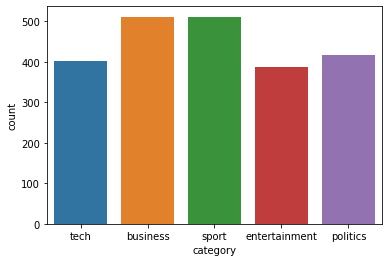

In [11]:
sns.countplot(x=df["category"],data=df)

### Removing all stopwords and punctuations

In [12]:
import spacy
nlp = spacy.load('en_core_web_sm')
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import re

    

In [13]:
lemmatizer = WordNetLemmatizer()
for index,value in df["text"].items():
    text = re.sub(' +', ' ', df["text"][index])
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = text.split()
    text = [ lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
    df["text"][index] = " ".join(text)
print("done")    

done


In [14]:
df["text"].head()

0    tv future hand viewer home theatre system plas...
1    worldcom bos left book alone former worldcom b...
2    tiger wary farrell gamble leicester say rushed...
3    yeading face newcastle fa cup premiership side...
4    ocean twelve raid box office ocean twelve crim...
Name: text, dtype: object

In [16]:
df.head()

,category,text
0,tech,tv future hand viewer home theatre system plas...
1,business,worldcom bos left book alone former worldcom b...
2,sport,tiger wary farrell gamble leicester say rushed...
3,sport,yeading face newcastle fa cup premiership side...
4,entertainment,ocean twelve raid box office ocean twelve crim...


In [54]:
X = df["text"]
y = df["category"]

### Split the data into train & test sets

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape

(1780,)

In [57]:
X_test.shape

(445,)

In [58]:
y_train.shape

(1780,)

In [59]:
y_test.shape

(445,)

### Build pipelines to vectorize the data, then train and fit a model
Now that we have sets to train and test, we'll develop a selection of pipelines, each with a different model.

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### 1. Naive Bayes

In [61]:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

## Feed the training data through the pipeline
text_clf_nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [62]:
# Run predictions and analyze the results

# Form a prediction set
predictions = text_clf_nb.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
print("Confusion matrix :")
print(metrics.confusion_matrix(y_test,predictions))
print("\n")

# Print a classification report
print("Classification Report :")
print(metrics.classification_report(y_test,predictions))
print("\n")

# Print the accuracy
print("Accuracy :")
print( metrics.accuracy_score(y_test,predictions))

Confusion matrix :
[[96  0  5  0  0]
 [ 3 72  2  0  4]
 [ 2  0 81  0  0]
 [ 0  0  0 98  0]
 [ 1  0  0  1 80]]


Classification Report :
               precision    recall  f1-score   support

     business       0.94      0.95      0.95       101
entertainment       1.00      0.89      0.94        81
     politics       0.92      0.98      0.95        83
        sport       0.99      1.00      0.99        98
         tech       0.95      0.98      0.96        82

    micro avg       0.96      0.96      0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



Accuracy :
0.9595505617977528


#### 2. Support Vector Machine

In [63]:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

## Feed the training data through the pipeline
text_clf_lsvc.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [64]:
# Run predictions and analyze the results

# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
print("Confusion matrix :")
print(metrics.confusion_matrix(y_test,predictions))
print("\n")

# Print a classification report
print("Classification Report :")
print(metrics.classification_report(y_test,predictions))
print("\n")

# Print the accuracy
print("Accuracy :")
print( metrics.accuracy_score(y_test,predictions))

Confusion matrix :
[[93  1  5  1  1]
 [ 0 80  0  0  1]
 [ 2  0 81  0  0]
 [ 0  0  0 98  0]
 [ 1  0  0  1 80]]


Classification Report :
               precision    recall  f1-score   support

     business       0.97      0.92      0.94       101
entertainment       0.99      0.99      0.99        81
     politics       0.94      0.98      0.96        83
        sport       0.98      1.00      0.99        98
         tech       0.98      0.98      0.98        82

    micro avg       0.97      0.97      0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



Accuracy :
0.9707865168539326


#### 3. Decision Tree

In [65]:
text_clf_dt = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', DecisionTreeClassifier()),
])

## Feed the training data through the pipeline
text_clf_dt.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [66]:
# Run predictions and analyze the results

# Form a prediction set
predictions = text_clf_dt.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
print("Confusion matrix :")
print(metrics.confusion_matrix(y_test,predictions))
print("\n")

# Print a classification report
print("Classification Report :")
print(metrics.classification_report(y_test,predictions))
print("\n")

# Print the accuracy
print("Accuracy :")
print( metrics.accuracy_score(y_test,predictions))

Confusion matrix :
[[81  4  9  3  4]
 [ 3 65  0  4  9]
 [ 8  5 68  1  1]
 [ 4  0  4 89  1]
 [ 6  2  4  1 69]]


Classification Report :
               precision    recall  f1-score   support

     business       0.79      0.80      0.80       101
entertainment       0.86      0.80      0.83        81
     politics       0.80      0.82      0.81        83
        sport       0.91      0.91      0.91        98
         tech       0.82      0.84      0.83        82

    micro avg       0.84      0.84      0.84       445
    macro avg       0.84      0.83      0.84       445
 weighted avg       0.84      0.84      0.84       445



Accuracy :
0.8359550561797753


#### 4. K Neighbour

In [67]:
text_clf_knn = Pipeline([('tfidf', TfidfVectorizer()),
                          ('clf',KNeighborsClassifier())
                        ])

text_clf_knn.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [68]:
# Run predictions and analyze the results

# Form a prediction set
predictions = text_clf_knn.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
print("Confusion matrix :")
print(metrics.confusion_matrix(y_test,predictions))
print("\n")

# Print a classification report
print("Classification Report :")
print(metrics.classification_report(y_test,predictions))
print("\n")

# Print the accuracy
print("Accuracy :")
print( metrics.accuracy_score(y_test,predictions))

Confusion matrix :
[[88  0 10  2  1]
 [ 1 76  2  0  2]
 [ 5  0 78  0  0]
 [ 0  0  0 98  0]
 [ 0  2  0  0 80]]


Classification Report :
               precision    recall  f1-score   support

     business       0.94      0.87      0.90       101
entertainment       0.97      0.94      0.96        81
     politics       0.87      0.94      0.90        83
        sport       0.98      1.00      0.99        98
         tech       0.96      0.98      0.97        82

    micro avg       0.94      0.94      0.94       445
    macro avg       0.94      0.94      0.94       445
 weighted avg       0.94      0.94      0.94       445



Accuracy :
0.9438202247191011


#### 4. Random Forest

In [69]:
text_clf_rf = Pipeline([('tfidf',TfidfVectorizer()),
                        ('clf',RandomForestClassifier())
    
])
text_clf_rf.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [70]:
# Run predictions and analyze the results

# Form a prediction set
predictions = text_clf_rf.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
print("Confusion matrix :")
print(metrics.confusion_matrix(y_test,predictions))
print("\n")

# Print a classification report
print("Classification Report :")
print(metrics.classification_report(y_test,predictions))
print("\n")

# Print the accuracy
print("Accuracy :")
print( metrics.accuracy_score(y_test,predictions))

Confusion matrix :
[[86  2  9  1  3]
 [ 6 71  0  4  0]
 [11  1 70  1  0]
 [ 1  0  1 96  0]
 [ 6  2  0  2 72]]


Classification Report :
               precision    recall  f1-score   support

     business       0.78      0.85      0.82       101
entertainment       0.93      0.88      0.90        81
     politics       0.88      0.84      0.86        83
        sport       0.92      0.98      0.95        98
         tech       0.96      0.88      0.92        82

    micro avg       0.89      0.89      0.89       445
    macro avg       0.89      0.89      0.89       445
 weighted avg       0.89      0.89      0.89       445



Accuracy :
0.8876404494382022


In [78]:
news1 = """Amazon on Tuesday unveiled a new biometric payment system using palm recognition,
to be made available to rival retailers and also promoted as a replacement 
for badge entry at stadiums or workplaces.
"""

news2 = """
        Novak Djokovic laid down the challenge to his French Open rivals by only dropping five games in a first-round win against Sweden's Mikael Ymer.
The Serb top seed, who is bidding for an 18th Grand Slam and a second French Open, eased to a 6-0 6-2 6-3 victory.
After cruising to a 20-minute opening set, Djokovic ruthlessly maintained his level to win in an hour and 38 minutes.
"This is what my intentions will be, trying to get off the blocks very strong with a good intensity," he said.
"""

print(text_clf_lsvc.predict([news1]))
print(text_clf_lsvc.predict([news2]))


['tech']
['sport']
